In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.datasets import load_wine




In [4]:
df = pd.read_csv("winequality-red.csv")
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Конструирование признаков

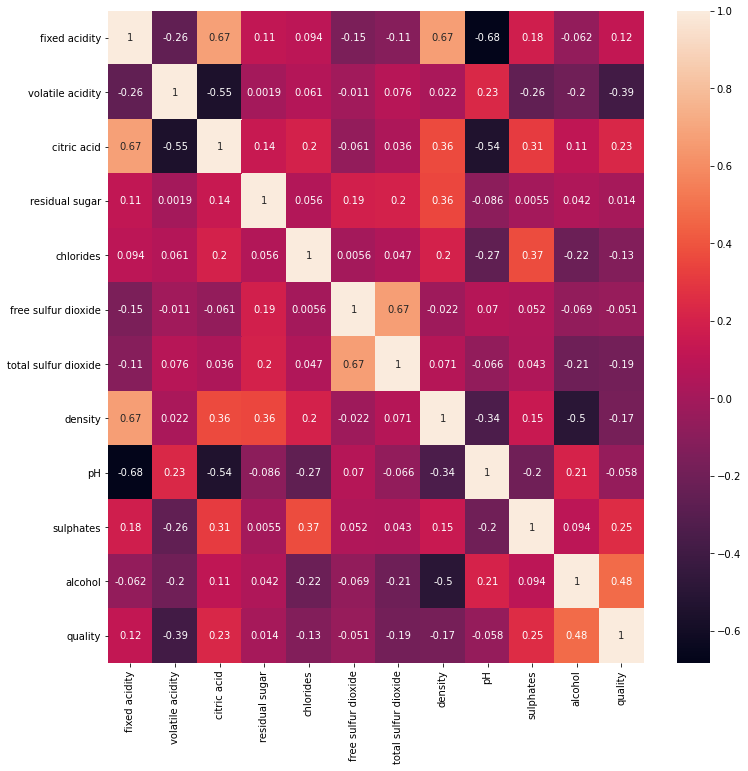

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(),annot=True, cmap="rocket")
plt.show()

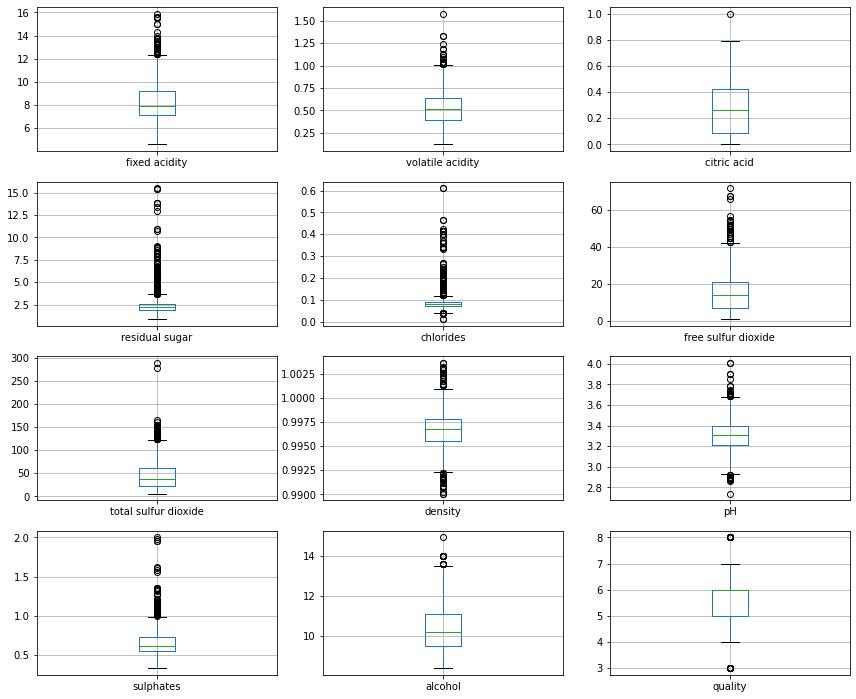

In [9]:
df.plot(kind='box',subplots=True,layout=(5,3),grid=True,figsize=(12,12))
plt.tight_layout()
plt.show()

 Конструирование признаков (Feature Engineering)

In [10]:
bins = (2,6.5,8)

group_names = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins = bins, labels=group_names)

In [11]:
encode = LabelEncoder()

In [12]:
df['quality'] = encode.fit_transform(df['quality'])

In [13]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

C:\Users\isanc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

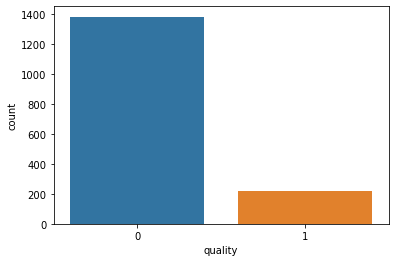

In [14]:
sns.countplot(df['quality'])

Разделим данные на  Train и Test

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [19]:
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [20]:
print(f"Значения X_train после нормализации {X_train}")
print("<-------------------------------------------------------------->")
print(f"Значения X_test после нормализации {X_test}")

Значения X_train после нормализации [[0.34821429 0.25342466 0.29       ... 0.1496063  0.98773006 0.21538462]
 [0.29464286 0.04109589 0.37       ... 0.11811024 0.04294479 0.66153846]
 [0.1875     0.37671233 0.         ... 0.51968504 0.22699387 0.2       ]
 ...
 [0.28571429 0.30821918 0.31       ... 0.43307087 0.19631902 0.16923077]
 [0.74107143 0.23972603 0.49       ... 0.44094488 0.19018405 0.66153846]
 [0.45535714 0.5890411  0.32       ... 0.4015748  0.06748466 0.15384615]]
<-------------------------------------------------------------->
Значения X_test после нормализации [[0.56363636 0.35227273 0.5443038  ... 0.28431373 0.42574257 0.42857143]
 [0.31818182 0.75       0.         ... 0.47058824 0.1980198  0.21428571]
 [0.40909091 0.14772727 0.41772152 ... 0.37254902 0.5049505  0.58928571]
 ...
 [0.29090909 0.44318182 0.44303797 ... 0.3627451  0.22772277 0.14285714]
 [0.2        0.55681818 0.02531646 ... 0.46078431 0.28712871 0.35714286]
 [0.30909091 0.30681818 0.4556962  ... 0.45098039 

In [21]:
y_train.value_counts()

0    952
1    167
Name: quality, dtype: int64

In [22]:
y_test.value_counts()

0    430
1     50
Name: quality, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model_dt = DecisionTreeClassifier(random_state = 10)
model_knn = KNeighborsClassifier(n_neighbors = 10, n_jobs = -1)


In [25]:
from sklearn.metrics import accuracy_score

score_values = []
def modelling(models, X_train, y_train, X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        score = accuracy_score(y_test, predict)
        score_values.append(score)
        print(f"Accurace score of {model} is :: ", score)
       
models = [model_dt,model_knn]
modelling(models, X_train, y_train, X_test, y_test)

Accurace score of DecisionTreeClassifier(random_state=10) is ::  0.75
Accurace score of KNeighborsClassifier(n_jobs=-1, n_neighbors=10) is ::  0.88125
